In [1]:
# Importamos la librería pandas que nos servirá para el dataframe:
import pandas as pd

In [2]:
# Cargamos el archivo csv con los datos que vamos a utilizar:
data = pd.read_csv("C:\Técnico-Universitario-Data-Science\Machine-Learning-Clasificación-Y-Regresión\M2\AmesHousing.csv")

In [3]:
# Imprimimos los primeros 5 filas y mostramos la cantidad de filas y columnas que tiene el dataset:
print(data.head)
print(data.shape)

<bound method NDFrame.head of       Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alle

In [4]:
# Calculamos la cantidad de valores NAN (Not a Number) de nuestras variables:
nan = data.isna().sum()

# Usamos pd.set_option() para establecer la opción de visualización de pandas para mostrar todas las filas con valores NAN:
pd.set_option("display.max_rows", None)
print(nan)

Order                 0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        490
Lot Area              0
Street                0
Alley              2732
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type       1775
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            80
Bsmt Cond            80
Bsmt Exposure        83
BsmtFin Type 1       80
BsmtFin SF 1          1
BsmtFin Type 2       81
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [5]:
# Ordenamos de mayor a menor los valores NAN de nuestras variables, visualizamos todas las filas e imprimimos los valores:
nan_ordenados = nan.sort_values(ascending=False)
pd.set_option("display.max_rows", None)
print(nan_ordenados)

Pool QC            2917
Misc Feature       2824
Alley              2732
Fence              2358
Mas Vnr Type       1775
Fireplace Qu       1422
Lot Frontage        490
Garage Cond         159
Garage Finish       159
Garage Yr Blt       159
Garage Qual         159
Garage Type         157
Bsmt Exposure        83
BsmtFin Type 2       81
Bsmt Qual            80
Bsmt Cond            80
BsmtFin Type 1       80
Mas Vnr Area         23
Bsmt Full Bath        2
Bsmt Half Bath        2
BsmtFin SF 1          1
Garage Cars           1
Electrical            1
Total Bsmt SF         1
Bsmt Unf SF           1
BsmtFin SF 2          1
Garage Area           1
Paved Drive           0
Full Bath             0
Half Bath             0
Bedroom AbvGr         0
Kitchen AbvGr         0
Kitchen Qual          0
TotRms AbvGrd         0
Sale Condition        0
Sale Type             0
Yr Sold               0
Mo Sold               0
Misc Val              0
Functional            0
Fireplaces            0
Pool Area       

In [6]:
from sklearn.impute import SimpleImputer

# Función para imputar valores NaN en columnas numéricas y categóricas:
def imputar_nans(data):
    # Imputación para columnas numéricas:
    numeric_imputer = SimpleImputer(strategy="mean")
    numeric_columns = data.select_dtypes(include=["number"]).columns
    data[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])

    # Imputación para columnas categóricas:
    categorical_imputer = SimpleImputer(strategy="most_frequent")
    categorical_columns = data.select_dtypes(include=["object"]).columns
    data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

    return data

# Imputamos NaNs del DataFrame:
df_imputed = imputar_nans(data)

# Verificamos si quedan NaNs en el DataFrame después de la imputación:
nans_despues_imputacion = df_imputed.isna().any().any()

if not nans_despues_imputacion:
    print("No hay valores NaN en el DataFrame después de la imputación.")
else:
    print("Aún hay valores NaN en el DataFrame después de la imputación.")

No hay valores NaN en el DataFrame después de la imputación.


In [7]:
# Hacemos un recuento visual para saber si en todas las filas no hay valores NAN:
datos = data.isna().sum()
pd.set_option("display.max_rows", None)
print(datos)

Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area  

In [8]:
# Hacemos un recuento visual para saber si en todas las filas no hay valores Null:
datos1 = data.isnull().sum()
pd.set_option("display.max_rows", None)
print(datos1)

Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area  

In [13]:
# En lugar de eliminar los outliers, imputamos por la media; Eliminamos columnas no numéricas si es necesario:
df_numeric = df_imputed.select_dtypes(include=['number'])

# Calculamos el rango intercuartílico (IQR) solo en columnas numéricas:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites superior e inferior para identificar outliers:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Alineamos los DataFrames:
df_imputed, lower_limit = df_imputed.align(lower_limit, axis=1)
df_imputed, upper_limit = df_imputed.align(upper_limit, axis=1)

# Identificamos outliers:
outliers = (df_imputed < lower_limit) | (df_imputed > upper_limit)

# Eliminamos outliers:
df_cleaned = df_imputed[~outliers.any(axis=1)]

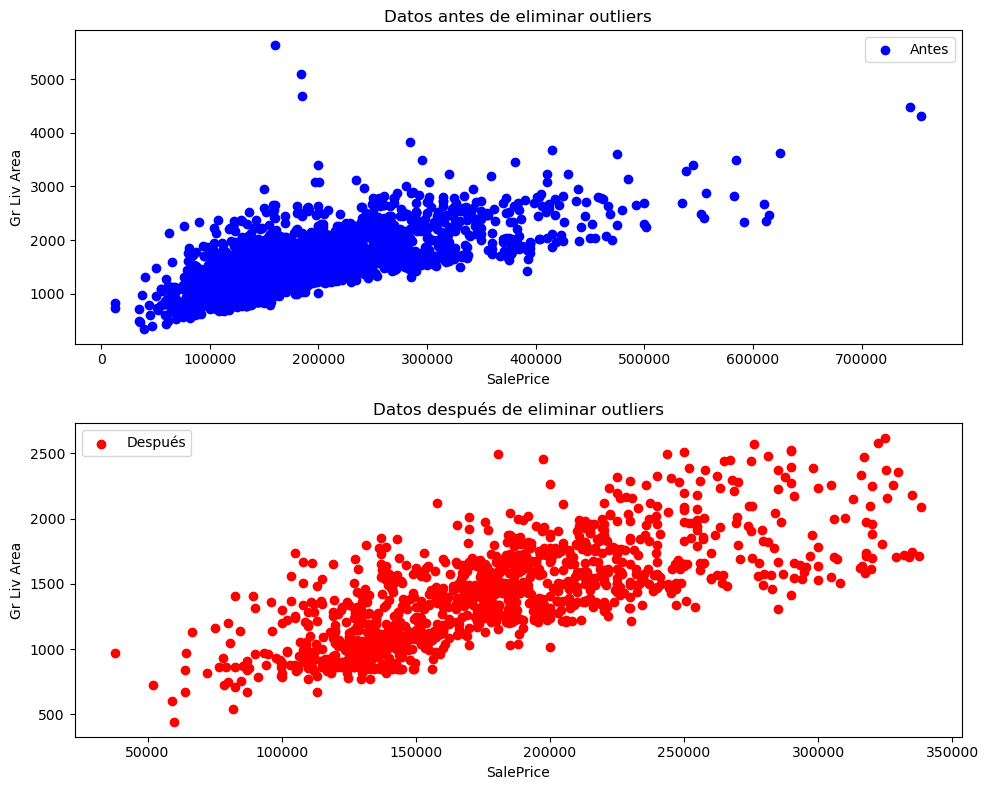

In [14]:
# Graficamos los outliers, antes y después:
import matplotlib.pyplot as plt

# Creamos subplots para comparar antes y después de eliminar outliers:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

axes[0].scatter(df_imputed['SalePrice'], df_imputed['Gr Liv Area'], color='blue', label='Antes')
axes[0].set_title('Datos antes de eliminar outliers')
axes[0].set_xlabel('SalePrice')
axes[0].set_ylabel('Gr Liv Area')

# Gráfico después de eliminar outliers:
axes[1].scatter(df_cleaned['SalePrice'], df_cleaned['Gr Liv Area'], color='red', label='Después')
axes[1].set_title('Datos después de eliminar outliers')
axes[1].set_xlabel('SalePrice')
axes[1].set_ylabel('Gr Liv Area')

# Mostramos leyenda:
axes[0].legend()
axes[1].legend()

# Ajustamos diseño:
plt.tight_layout()

# Mostramos gráfico:
plt.show()

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# DataFrame que contiene todas tus características y la variable objetivo:
X = df_cleaned.drop(columns=["SalePrice"])  # Características
Y = df_cleaned["SalePrice"]  # Variable objetivo

# Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%):
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Definimos preprocesamiento para variables numéricas y categóricas:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Definimos el modelo de regresión Ridge:
ridge_model = Ridge()

# Construimos pipeline con preprocesamiento y modelo:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', ridge_model)])

# Definimos parámetros para búsqueda de hiperparámetros:
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0]
}

# Aplicamos GridSearchCV para encontrar los mejores hiperparámetros:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)  

# Mejor modelo encontrado:
best_model = grid_search.best_estimator_

best_model.fit(X_train, Y_train)

# Realizamos predicciones:
predicciones = best_model.predict(X_test)

# Evaluamos el rendimiento del modelo:
mse = mean_squared_error(Y_test, predicciones)

# Imprimimos resultados:
print("Predicciones:", predicciones[:5])
print("Valores reales:", Y_test[:5].values)
print("Error cuadrático medio (MSE):", mse)

Predicciones: [149406.52248176 171945.00992231 305658.39336245 150579.59726659
 146449.34285941]
Valores reales: [146800. 175900. 320000. 148000. 143500.]
Error cuadrático medio (MSE): 250961071.62229618


# Me quedó un MSE muy alto........pero menor a la entrega anterior.    :(

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV
from skopt.space import Categorical

# DataFrame que contiene todas tus características y la variable objetivo:
X = df_cleaned.drop(columns=["SalePrice"])  # Características
Y = df_cleaned["SalePrice"]  # Variable objetivo

# Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%):
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Definimos preprocesamiento para variables numéricas y categóricas:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Definimos el modelo de regresión lineal:
linear_model = LinearRegression()

# Construimos pipeline con preprocesamiento y modelo:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', linear_model)])

# Definimos espacio de búsqueda para optimización bayesiana:
param_space = {
    'regressor__fit_intercept': Categorical([True, False]),
}

# Realizamos la optimización bayesiana con validación cruzada:
bayes_search = BayesSearchCV(
    pipeline,
    param_space,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    n_iter=20,  # Número de iteraciones de la optimización bayesiana
    random_state=42
)
bayes_search.fit(X_train, Y_train)

# Mejor modelo encontrado:
best_model = bayes_search.best_estimator_

# Realizamos predicciones:
predicciones = best_model.predict(X_test)

# Evaluamos el rendimiento del modelo:
mse = mean_squared_error(Y_test, predicciones)

# Imprimimos resultados:
print("Predicciones:", predicciones[:5])
print("Valores reales:", Y_test[:5].values)
print("Error cuadrático medio (MSE):", mse)

C:\Users\ariel\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False] before, using random point [True]
  warnings.warn(
C:\Users\ariel\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False] before, using random point [False]
  warnings.warn(
C:\Users\ariel\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False] before, using random point [True]
  warnings.warn(
C:\Users\ariel\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False] before, using random point [True]
  warnings.warn(
C:\Users\ariel\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False] before, using random point [False]
  warnings.warn(
C:\Users\ariel\anaconda3\Lib\site-packages\

Predicciones: [145419.  169808.  304950.5 164471.5 153429. ]
Valores reales: [146800. 175900. 320000. 148000. 143500.]
Error cuadrático medio (MSE): 2.1375602299718829e+27
